In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [12]:
ff1.Cache.enable_cache('C:\code\python/2022_season_analysis_CODES')

QUALIFYING

In [13]:
miami_quali = ff1.get_session(2022, 'Miami', 'Q')
print(miami_quali.date)

2022-05-07 16:00:00


In [14]:
miami_quali.load();
miami_quali_laps = miami_quali.laps

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63', '5', '3', '47', '20', '24', '23', '6', '31']


In [15]:
miami_quali.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:29.474000,0 days 00:01:29.130000,0 days 00:01:28.796000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,0.0,0 days 00:01:30.079000,0 days 00:01:29.729000,0 days 00:01:28.986000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,3.0,0.0,0 days 00:01:29.836000,0 days 00:01:29.202000,0 days 00:01:28.991000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,0.0,0 days 00:01:30.055000,0 days 00:01:29.673000,0 days 00:01:29.036000,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,0.0,0 days 00:01:30.845000,0 days 00:01:29.751000,0 days 00:01:29.475000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,6.0,0.0,0 days 00:01:30.388000,0 days 00:01:29.797000,0 days 00:01:29.625000,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,7.0,0.0,0 days 00:01:30.779000,0 days 00:01:30.128000,0 days 00:01:29.690000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,8.0,0.0,0 days 00:01:30.761000,0 days 00:01:29.634000,0 days 00:01:29.750000,NaT,,0.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,9.0,0.0,0 days 00:01:30.485000,0 days 00:01:30.031000,0 days 00:01:29.932000,NaT,,0.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,0.0,0 days 00:01:30.441000,0 days 00:01:29.996000,0 days 00:01:30.676000,NaT,,0.0


In [16]:
fastest_quali_lap = miami_quali_laps.pick_fastest()
fastest_quali_lap

Time                      0 days 01:15:31.451000
DriverNumber                                  16
LapTime                   0 days 00:01:28.796000
LapNumber                                   23.0
Stint                                        8.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:29.441000
Sector2Time               0 days 00:00:33.831000
Sector3Time               0 days 00:00:25.524000
Sector1SessionTime        0 days 01:14:32.096000
Sector2SessionTime        0 days 01:15:05.927000
Sector3SessionTime        0 days 01:15:31.451000
SpeedI1                                    222.0
SpeedI2                                    194.0
SpeedFL                                    284.0
SpeedST                                    323.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           

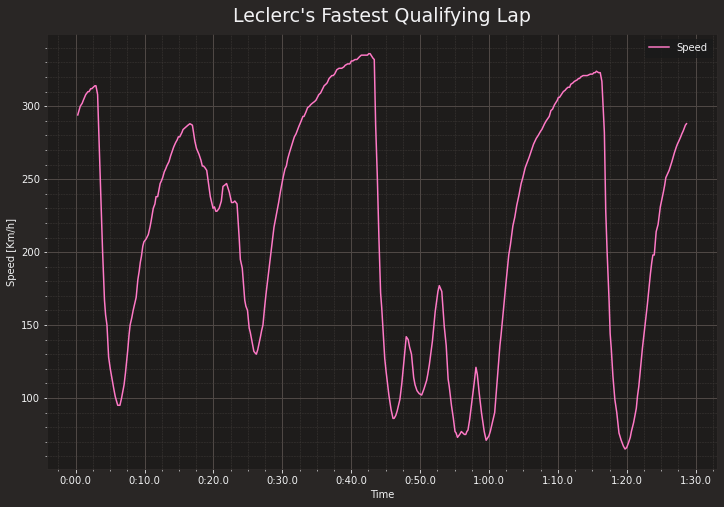

In [17]:
lec_fastest_quali_lap = miami_quali_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_quali_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Qualifying Lap")
ax.legend()

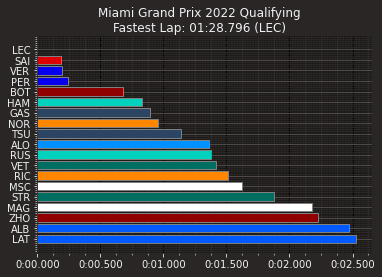

In [18]:
drivers = pd.unique(miami_quali.laps['Driver'])
#print(drivers)

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = miami_quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

ax.invert_yaxis()

ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{miami_quali.event['EventName']} {miami_quali.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63',

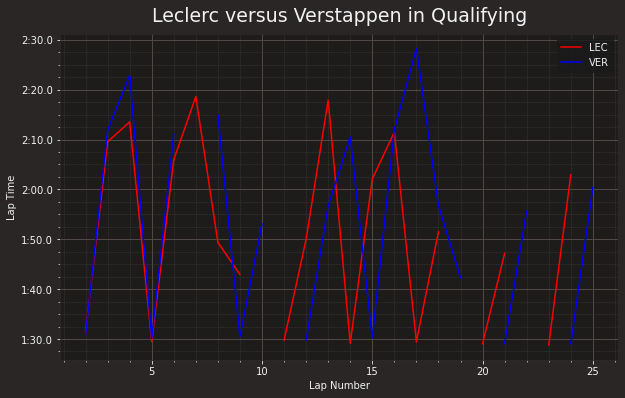

In [19]:
laps = miami_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('SAI')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Verstappen in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'VER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63',

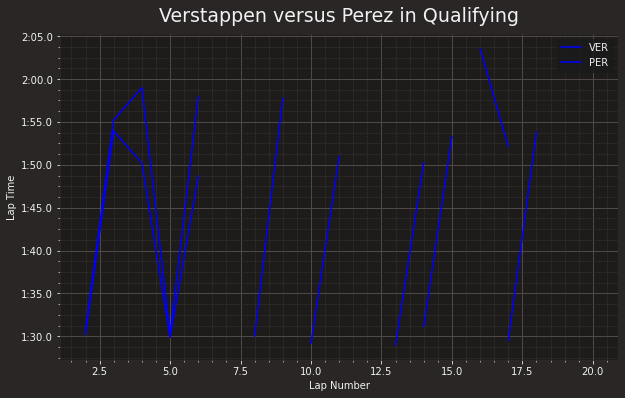

In [21]:
laps = miami_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('VER')
drv_2 = laps.pick_driver('PER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='blue')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Verstappen versus Perez in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['VER', 'PER'])

RACE

In [22]:
miami_race = ff1.get_session(2022, 'Miami', 'R')
print(miami_race.date)

2022-05-08 15:30:00


In [23]:
miami_race.load();
miami_race_laps = miami_race.laps
miami_race_laps

core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.3]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track statu

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:53.401000,1,NaT,1,1,0 days 00:23:51.168000,NaT,NaT,0 days 00:00:35.848000,0 days 00:00:26.431000,...,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Red Bull Racing,VER,1,False,2022-05-08 19:33:16.443
1,0 days 01:05:27.943000,1,0 days 00:01:34.542000,2,1,NaT,NaT,0 days 00:00:32.267000,0 days 00:00:35.970000,0 days 00:00:26.305000,...,False,MEDIUM,2.0,True,0 days 01:03:53.401000,Red Bull Racing,VER,1,True,2022-05-08 19:34:53.409
2,0 days 01:07:02.493000,1,0 days 00:01:34.550000,3,1,NaT,NaT,0 days 00:00:32.182000,0 days 00:00:36.062000,0 days 00:00:26.306000,...,False,MEDIUM,3.0,True,0 days 01:05:27.943000,Red Bull Racing,VER,1,True,2022-05-08 19:36:27.951
3,0 days 01:08:36.780000,1,0 days 00:01:34.287000,4,1,NaT,NaT,0 days 00:00:32.092000,0 days 00:00:35.968000,0 days 00:00:26.227000,...,False,MEDIUM,4.0,True,0 days 01:07:02.493000,Red Bull Racing,VER,1,True,2022-05-08 19:38:02.501
4,0 days 01:10:11.100000,1,0 days 00:01:34.320000,5,1,NaT,NaT,0 days 00:00:32.028000,0 days 00:00:35.942000,0 days 00:00:26.350000,...,False,MEDIUM,5.0,True,0 days 01:08:36.780000,Red Bull Racing,VER,1,True,2022-05-08 19:39:36.788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0 days 01:05:38.876000,24,0 days 00:01:37.487000,2,1,NaT,NaT,0 days 00:00:33.346000,0 days 00:00:37.351000,0 days 00:00:26.790000,...,False,MEDIUM,2.0,True,0 days 01:04:01.389000,Alfa Romeo,ZHO,1,True,2022-05-08 19:35:01.397
1052,0 days 01:07:15.603000,24,0 days 00:01:36.727000,3,1,NaT,NaT,0 days 00:00:33.214000,0 days 00:00:36.851000,0 days 00:00:26.662000,...,False,MEDIUM,3.0,True,0 days 01:05:38.876000,Alfa Romeo,ZHO,1,True,2022-05-08 19:36:38.884
1053,0 days 01:08:51.334000,24,0 days 00:01:35.731000,4,1,NaT,NaT,0 days 00:00:32.737000,0 days 00:00:36.503000,0 days 00:00:26.491000,...,True,MEDIUM,4.0,True,0 days 01:07:15.603000,Alfa Romeo,ZHO,1,True,2022-05-08 19:38:15.611
1054,0 days 01:10:27.217000,24,0 days 00:01:35.883000,5,1,NaT,NaT,0 days 00:00:32.771000,0 days 00:00:36.636000,0 days 00:00:26.476000,...,False,MEDIUM,5.0,True,0 days 01:08:51.334000,Alfa Romeo,ZHO,1,True,2022-05-08 19:39:51.342


In [25]:
miami_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,3.0,NaT,NaT,NaT,0 days 01:34:24.258000,Finished,26.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,1.0,NaT,NaT,NaT,0 days 01:34:28.044000,Finished,18.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,2.0,NaT,NaT,NaT,0 days 01:34:32.487000,Finished,15.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,4.0,NaT,NaT,NaT,0 days 01:34:34.896000,Finished,12.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,5.0,12.0,NaT,NaT,NaT,0 days 01:34:42.840000,Finished,10.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,6.0,6.0,NaT,NaT,NaT,0 days 01:34:45.626000,Finished,8.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,7.0,5.0,NaT,NaT,NaT,0 days 01:34:49.331000,Finished,6.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,8.0,20.0,NaT,NaT,NaT,0 days 01:34:52.644000,Finished,4.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,9.0,18.0,NaT,NaT,NaT,0 days 01:34:56.623000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,0.0,NaT,NaT,NaT,0 days 01:35:01.284000,Finished,1.0


In [26]:
fastest_race_lap = miami_race_laps.pick_fastest()
fastest_race_lap

Time                      0 days 02:32:05.205000
DriverNumber                                   1
LapTime                   0 days 00:01:31.361000
LapNumber                                     54
Stint                                          2
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:30.370000
Sector2Time               0 days 00:00:35.138000
Sector3Time               0 days 00:00:25.853000
Sector1SessionTime        0 days 02:31:04.214000
Sector2SessionTime        0 days 02:31:39.352000
Sector3SessionTime        0 days 02:32:05.205000
SpeedI1                                    220.0
SpeedI2                                    188.0
SpeedFL                                    275.0
SpeedST                                    312.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                    28.0
FreshTyre           

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '63', '44', '77', '31', '23', '18', '14', '22', '3', '6', '47', '20', '5', '10', '4', '24']


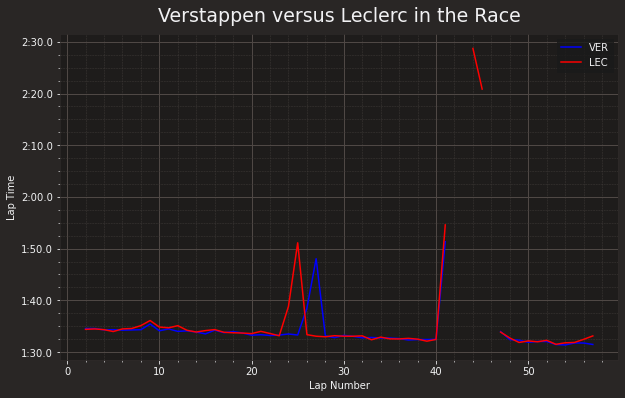

In [29]:
laps = miami_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('VER')
drv_2 = laps.pick_driver('LEC')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='blue')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='red')
ax.set_title('Verstappen versus Leclerc in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['VER', 'LEC'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '63', '44', '77', '31', '23', '18', '14', '22', '3', '6', '47', '20', '5', '10', '4', '24']


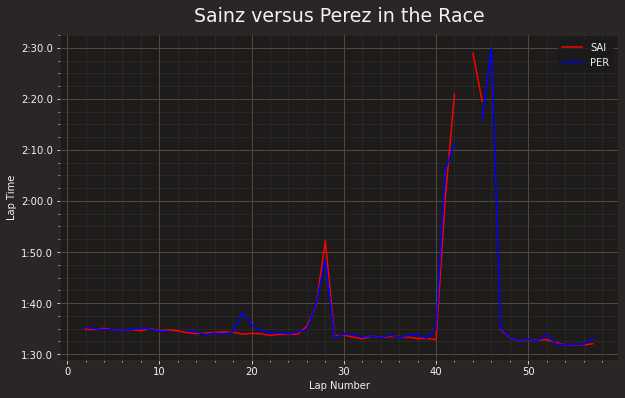

In [31]:
laps = miami_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('SAI')
drv_2 = laps.pick_driver('PER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Sainz versus Perez in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['SAI', 'PER'])

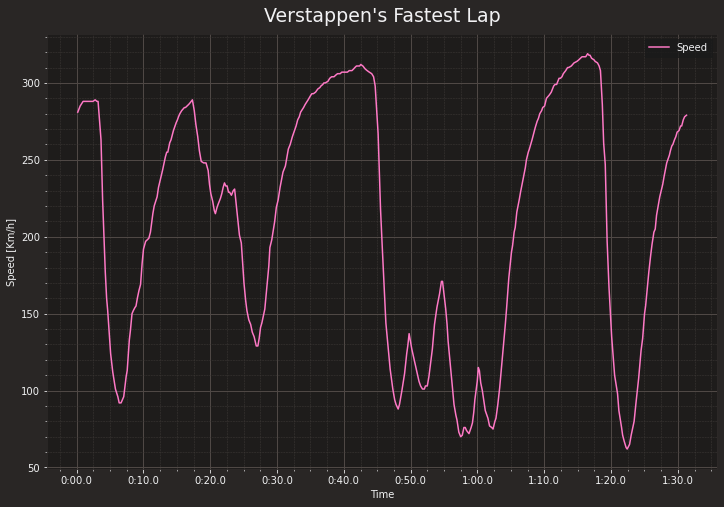

In [32]:
ver_fastest_lap = miami_race_laps.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velo = ver_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's Fastest Lap")
ax.legend()

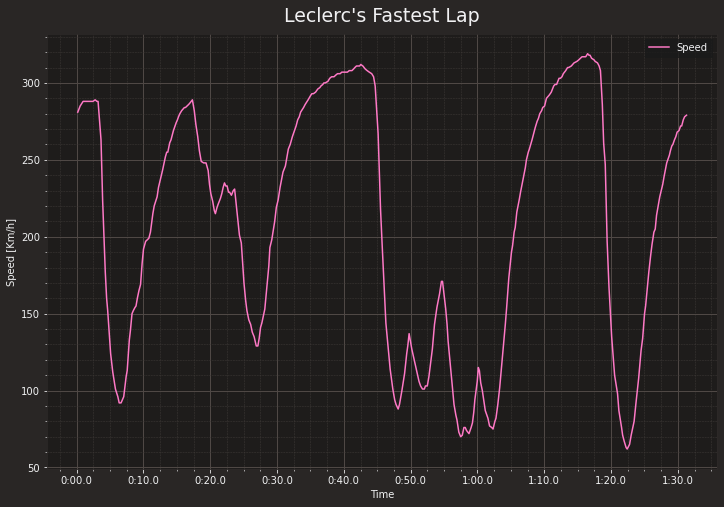

In [33]:
lec_fastest_lap = miami_race_laps.pick_driver('LEC').pick_fastest()
lec_car_data = ver_fastest_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Lap")
ax.legend()